In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sys, os
#sys.path.append('/u/ki/mbaumer/random_pixel_size/weak_sauce/code')
from weak_sauce.grid import MoveableGrid
import matplotlib
from scipy import ndimage

In [1]:
end_res.columns

NameError: name 'end_res' is not defined

In [2]:
(end_res['fwhm']-end_res['fwhm'].mean()).hist()

NameError: name 'end_res' is not defined

In [3]:
#LSST
#end_res = pd.read_pickle('/nfs/slac/g/ki/ki19/lsst/mbaumer/scienceImpactDFs/merged/lsst_psf_src.pkl')
end_res = pd.read_pickle('/nfs/slac/g/ki/ki19/lsst/mbaumer/scienceImpactDFs/for_paper/lsst_merged.pkl')
feat = pd.DataFrame()
feat['flux'] = end_res['flux']/(.001*np.log(10)/2.5) #convert to mMags
feat[['Mx','My']] = 200*end_res[['Mx','My']] 
feat[['e1','e2']] = .2**2/.27**2*end_res[['e1','e2']]
feat['e0'] = .2**2/.27**2*(end_res['e0']-end_res['e0'].mean())
#feat['inputE'] = np.round(end_res['inputE'].astype(float),decimals=1)
#feat[['inputS', 'inputTheta']] = end_res[['inputS', 'inputTheta']]
feat[['inputPSF','xctr','yctr']] = end_res[['inputPSF','xctr','yctr']]
#feat['totM'] = np.sqrt(feat['Mx']**2 + feat['My']**2)

In [4]:
perm_extent = []

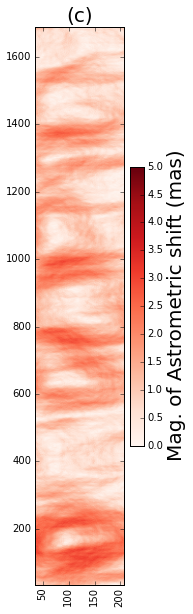

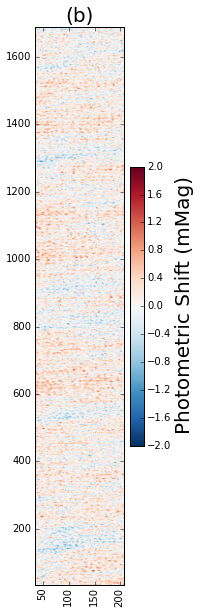

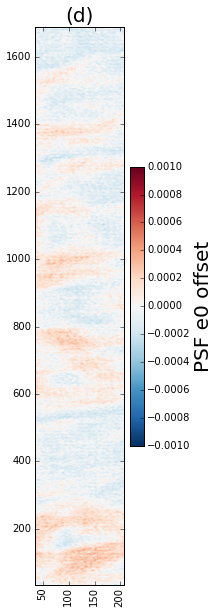

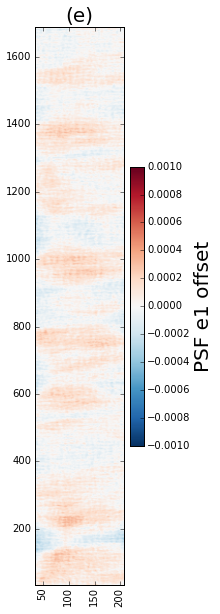

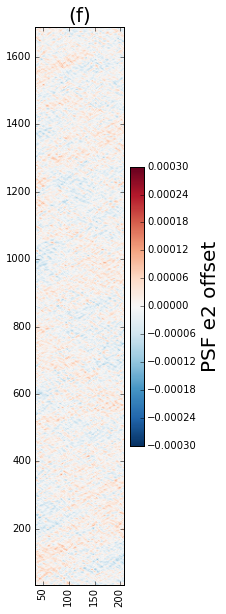

In [6]:
from __future__ import division
import matplotlib
#bins=(175,1655)
bins = (174/2,1654/2)
def makeSystMap(var=np.abs(feat['Mx']+1j*feat['My']),title='(c)', cmap=matplotlib.cm.RdBu_r, limits=(0,5),axtitle='Mag. of Astrometric shift (mas)'):
    num,xe,ye = np.histogram2d(feat['xctr'],feat['yctr'],bins=bins,weights=var);
    extent    = [xe[0], xe[-1], ye[0], ye[-1]]
    perm_extent.append(extent)
    denom,_,_ = np.histogram2d(feat['xctr'],feat['yctr'],bins=bins);
    img = num/denom
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2, 10))
    im = axs.imshow(img.T,cmap=cmap,extent=extent, vmin=limits[0], vmax=limits[1], aspect='auto',origin='lower')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    cbar = plt.colorbar(im, shrink=0.5)
    plt.title(title,size=20)
    # if DES
    #plt.xticks([200,400,600])
    cbar.set_label(axtitle,size=20)
makeSystMap(cmap=matplotlib.cm.Reds)
makeSystMap(var=feat['flux'],title='(b)', axtitle='Photometric Shift (mMag)',limits=(-2,2))
makeSystMap(var=feat['e0'],title='(d)', axtitle='PSF e0 offset',limits=(-1e-3,1e-3))
makeSystMap(var=feat['e1'],title='(e)', axtitle='PSF e1 offset',limits=(-1e-3,1e-3))
makeSystMap(var=feat['e2'],title='(f)', axtitle='PSF e2 offset',limits=(-3e-4,3e-4))

In [7]:
#DES
#end_res = pd.read_pickle('/nfs/slac/g/ki/ki19/lsst/mbaumer/scienceImpactDFs/merged/des_betterBRM_psf_src.pkl')
end_res = pd.read_pickle('/nfs/slac/g/ki/ki19/lsst/mbaumer/scienceImpactDFs/for_paper/des_merged.pkl')
feat = pd.DataFrame()
feat['flux'] = end_res['flux']/(.001*np.log(10)/2.5) #convert to mMags
feat[['Mx','My']] = 270*end_res[['Mx','My']] 
feat[['e1','e2']] = end_res[['e1','e2']]
feat['e0'] = (end_res['e0']-end_res['e0'].median())
#feat['inputE'] = np.round(end_res['inputE'].astype(float),decimals=1)
#feat[['inputS', 'inputTheta']] = end_res[['inputS', 'inputTheta']]
feat[['inputPSF','xctr','yctr']] = end_res[['inputPSF','xctr','yctr']]

feat = feat[np.logical_and(feat['flux'] > -7,feat['flux'] < 7)]


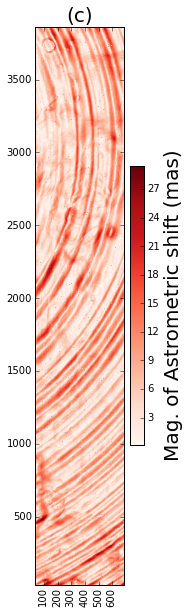

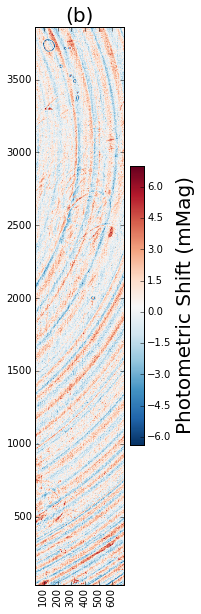

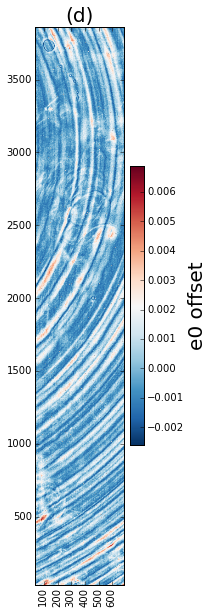

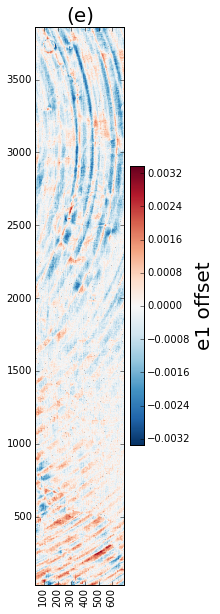

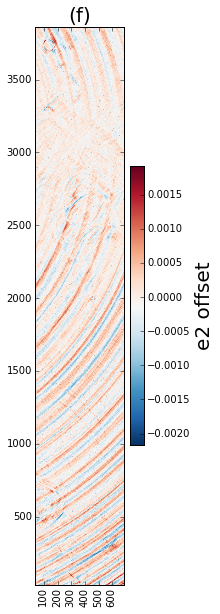

In [8]:
bins=(656/4,3828/4)
makeSystMap(var=np.abs(feat['Mx']+1j*feat['My']),cmap=matplotlib.cm.Reds,limits=(None,None))
makeSystMap(var=feat['flux'],title='(b)', axtitle='Photometric Shift (mMag)',limits=(None,None))
makeSystMap(var=feat['e0'],title='(d)', axtitle='e0 offset',limits=(None,None))
makeSystMap(var=feat['e1'],title='(e)', axtitle='e1 offset',limits=(None,None))
makeSystMap(var=feat['e2'],title='(f)', axtitle='e2 offset',limits=(None,None))

#Dev stuff

1.21393227483 0.660191869329 1.13224036903


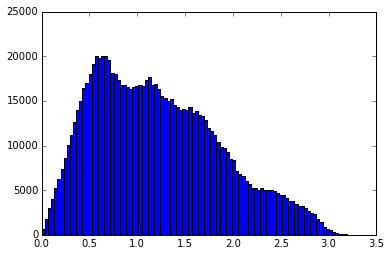

In [7]:
test = np.abs(feat['Mx']+1j*feat['My'])
#test = feat['e1']
plt.hist(test,bins=100);
print np.mean(test), np.std(test), np.median(test)

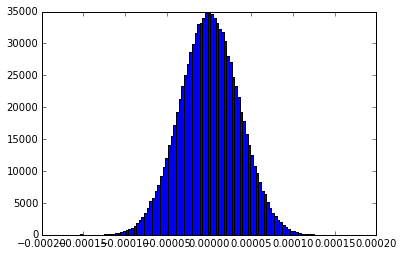

In [4]:
plt.hist(feat['e2'],bins=100);

<matplotlib.colorbar.Colorbar instance at 0x7f32b83d4680>

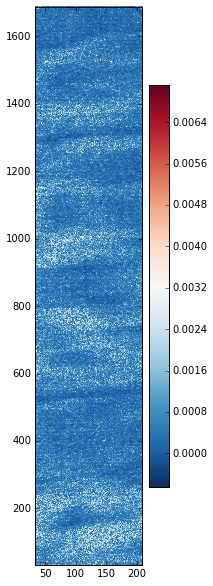

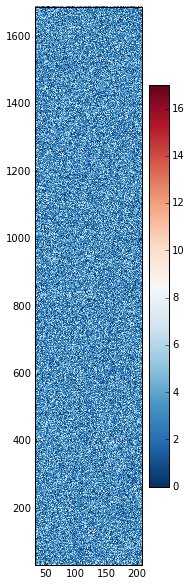

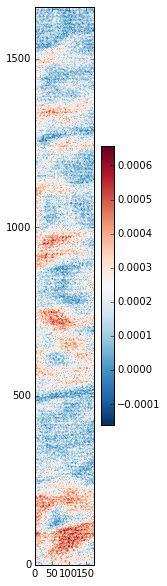

In [21]:
from __future__ import division
import matplotlib
plt.figure(figsize=(2.4,10))
num,_,_,_ = plt.hist2d(feat['xctr'],feat['yctr'],bins=(175,1655),weights=feat['e0'],cmap=matplotlib.cm.RdBu_r);
plt.colorbar()
plt.figure(figsize=(2.4,10))
denom,_,_,_ = plt.hist2d(feat['xctr'],feat['yctr'],bins=(175,1655),cmap=matplotlib.cm.RdBu_r);
img = num/denom
plt.colorbar()
plt.figure(figsize=(2.4,10))
plt.imshow(img.T,cmap=matplotlib.cm.RdBu_r,origin='lower')
plt.colorbar(shrink=0.5)

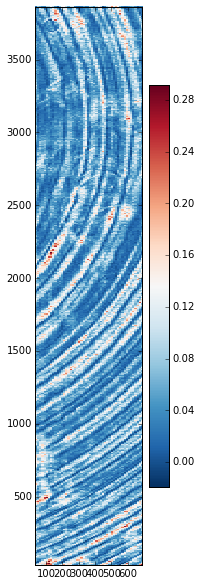

In [18]:
import matplotlib
plt.figure(figsize=(2.4,10))
plt.hist2d(feat['xctr'],feat['yctr'],bins=(50,500),weights=feat['e0'],cmap=matplotlib.cm.RdBu_r);
cbar = plt.colorbar()

In [ ]:
def makeSystMap(var=np.abs(feat['Mx']+1j*feat['My']),title='Astrometric Shift', axtitle='Astrometric shift (mas)'):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.4, 10))
    #des.source.plot(des.source.fluxes,fig=fig,ax=axs[0])
    #im = plt.imshow(ndimage.gaussian_filter(des.source.fluxes.transpose(),sigma=(2,2), order=0),cmap=matplotlib.cm.RdBu_r)
    #axs[0].set_title('Coadded flatcor')
    #cbar = plt.colorbar(im,ax=axs[0],shrink=.5)
    #cbar.set_label('Relative Flux')
    sc = plt.scatter(feat['xctr'],feat['yctr'],c=var,marker='s',cmap=matplotlib.cm.RdBu_r,edgecolors='None')
    #axs[1].set_title(title)
    plt.title(title)
    #DES
    #plt.ylim(25,3850)
    #plt.xlim(25,700)
    #LSST
    plt.xlim(25,217)
    plt.ylim(25,1700)
    cbar2 = plt.colorbar(sc,shrink=.5)
    cbar2.set_label(axtitle)

makeSystMap()
makeSystMap(var=feat['flux'],title='Photometric Shift', axtitle='Photometric Shift (mMag)')
makeSystMap(var=feat['e0'],title='PSF e0', axtitle='e0 offset')
makeSystMap(var=feat['e1'],title='PSF e1', axtitle='e1 offset')
makeSystMap(var=feat['e2'],title='PSF e2', axtitle='e2 offset')

##Old Figures

In [35]:
#saved_mg = MoveableGrid('/nfs/slac/g/ki/ki19/des/mbaumer/ccd_mg_model_fits/des_chip04_maxit2500_step0.5_decay0.0001/mg.pkl')
#flat = saved_mg.source.fluxes
print feat.shape
feat = feat.dropna()
print feat.shape
feat = feat[np.logical_and(feat['Mx'] > -15,feat['Mx'] < 15)]
print feat.shape
feat = feat[np.logical_and(feat['My'] > -15,feat['My'] < 15)]
print feat.shape
feat = feat[np.logical_and(feat['flux'] > -6,feat['flux'] < 6)]
print feat.shape
feat = feat[np.logical_and(feat['inputPSF'] > 1.9,feat['inputPSF'] < 2.1)]
print feat.shape

(55250, 9)
(55250, 9)
(55250, 9)
(55250, 9)
(55250, 9)
(4250, 9)


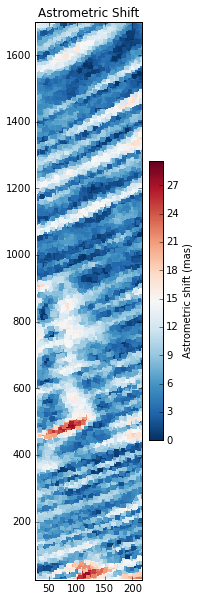

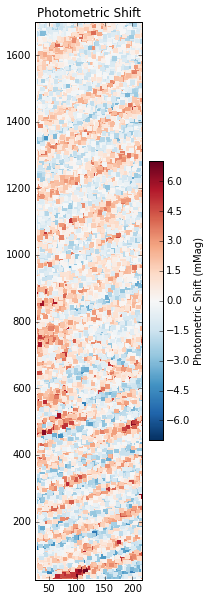

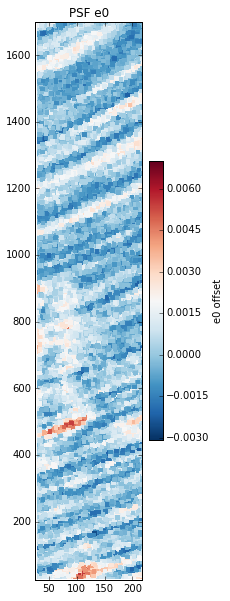

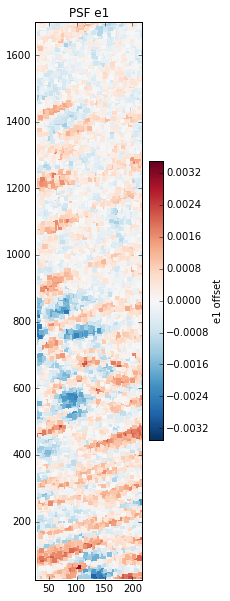

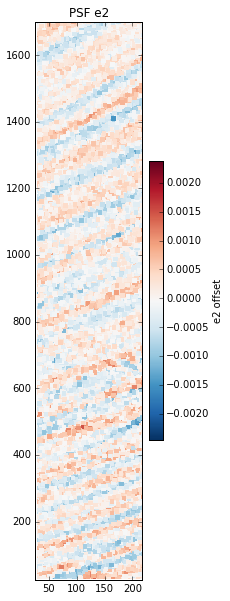

In [24]:
import matplotlib
from scipy import ndimage

def makeSystMap(var=np.abs(feat['Mx']+1j*feat['My']),title='Astrometric Shift', axtitle='Astrometric shift (mas)'):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.4, 10))
    #des.source.plot(des.source.fluxes,fig=fig,ax=axs[0])
    #im = plt.imshow(ndimage.gaussian_filter(des.source.fluxes.transpose(),sigma=(2,2), order=0),cmap=matplotlib.cm.RdBu_r)
    #axs[0].set_title('Coadded flatcor')
    #cbar = plt.colorbar(im,ax=axs[0],shrink=.5)
    #cbar.set_label('Relative Flux')
    sc = plt.scatter(feat['xctr'],feat['yctr'],c=var,marker='s',cmap=matplotlib.cm.RdBu_r,edgecolors='None')
    #axs[1].set_title(title)
    plt.title(title)
    #DES
    #plt.ylim(25,3850)
    #plt.xlim(25,700)
    #LSST
    plt.xlim(25,217)
    plt.ylim(25,1700)
    cbar2 = plt.colorbar(sc,shrink=.5)
    cbar2.set_label(axtitle)

makeSystMap()
makeSystMap(var=feat['flux'],title='Photometric Shift', axtitle='Photometric Shift (mMag)')
makeSystMap(var=feat['e0'],title='PSF e0', axtitle='e0 offset')
makeSystMap(var=feat['e1'],title='PSF e1', axtitle='e1 offset')
makeSystMap(var=feat['e2'],title='PSF e2', axtitle='e2 offset')

([<matplotlib.axis.XTick at 0x7f9140548dd0>,
 <a list of 3 Text xticklabel objects>)

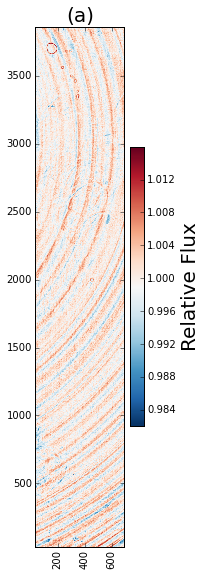

In [18]:
#from weak_sauce.grid import MoveableGrid
#DES
des = MoveableGrid('/nfs/slac/g/ki/ki19/des/mbaumer/ccd_mg_model_fits/des_chip04_maxit2500_step0.5_decay0.0001/mg.pkl')
#LSST
#des = MoveableGrid('../data/best_lsst_amp3_mg.pkl')

plt.figure(figsize=(2,10))
#im = plt.imshow(ndimage.gaussian_filter(des.source.fluxes.transpose(),sigma=(2,2), order=0),cmap=matplotlib.cm.RdBu_r,origin='lower',vmin=.998,vmax=1.002,extent=perm_extent[0],aspect=.66)
im = plt.imshow(ndimage.gaussian_filter(des.source.fluxes.transpose(),sigma=(2,2), order=0),cmap=matplotlib.cm.RdBu_r,origin='lower',extent=perm_extent[-1])
plt.title('(a)',size=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
cbar = plt.colorbar(im,shrink=.5)#,ticks=[.998,.999,1,1.001,1.002])
cbar.set_label('Relative Flux',size=20)
#cbar.set_ticklabels(['0.998','0.999','1.000','1.001','1.002'])
plt.xticks([200,400,600])

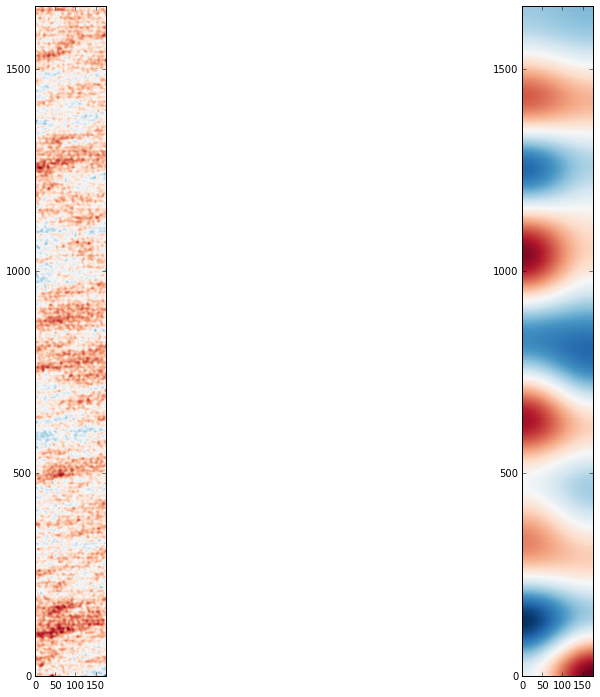

In [4]:
import matplotlib
from scipy import ndimage
flat = np.load('../data/big_lsst_flat.npy')[33:-33,33:-33]
#plt.figure(figsize=(8,12))
#plt.imshow(flat.T,cmap=matplotlib.cm.RdBu_r)
fig, axs = plt.subplots(1,2,figsize=(16,12))
axs[0].imshow(ndimage.gaussian_filter(flat.T,sigma=(3,3)),cmap=matplotlib.cm.RdBu_r,origin='lower')
#plt.figure(figsize=(8,12))
#plt.imshow(ndimage.laplace(ndimage.gaussian_filter(flat.T,sigma=(5,5))),cmap=matplotlib.cm.RdBu_r)
axs[1].imshow(ndimage.gaussian_filter(ndimage.laplace(ndimage.gaussian_filter(flat.T,sigma=(3,3))),sigma=(100,100)),cmap=matplotlib.cm.RdBu_r,origin='lower')

In [5]:
flat.shape

(176, 1656)